<a href="https://colab.research.google.com/github/CleanWater03/DL_2024_1/blob/main/DLweek2_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

train_images와 train_labels로 훈련 세트 구성

*   모델은 test_images와 test_labels로 구성된 테스트 세트에서 평가됨.
*   이미지는 Numpy 배열로 코드화(encoding)
*   레이블은 0부터 9까지의 숫자 배열
*   이미지와 레이블은 일대일 관계



In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


훈련 데이터 살펴보기

In [ ]:
train_images.shape
# .shape : Numpy 배열의 형태를 알아보는 함수

(60000, 28, 28)

In [ ]:
len(train_labels)
# len 함수 : 문자열의 길이 반환

60000

In [ ]:
train_labels
# 훈련데이터의 레이블 목록을 나열

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

평가 데이터 살펴보기

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

여기까지의 작업 순서
1. 훈련데이터를 네트워크에 주입.
2. 네트워크는 이미지와 레이블을 연관시키도록 학습.
3. 마지막으로 네트워크에 예측을 시켜 평가를 수행함.
* 답지주고 공부시키는것이라 할 수 있음

**The network architecture**

In [ ]:
# 라이브러리 불러오기
from tensorflow import keras
from tensorflow.keras import layers
# 딥러닝 모델 만들기
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**위 코드에서**
* Dense layer(조밀하게 연결된 신경망 층) 2개가  연속되어 있음.
* 처음 층에서 입력데이터를 활성화함수를 사용하여 Relu가 512차원의 벡터로 변환하고 두번째 층에서는 활성화함수 SoftMax가 10개의 출력 뉴런으로 변환함.
* 두 번째 층은 10개의 확률 점수가 들어있는 배열임.

**위 코드에서 사용된 활성화함수들**
* Relu : 음의 값을 0으로 변환하고 양의 값은 그대로 유지
* Softmax : 일반적으로 분류 문제에서 사용되는데, 출력값을 0부터 1사이의 확률 분포로 변환

**신경망의 훈련을 위해 CPU가 알아들을 수 있게 하는 단계(Compile)에 포함되어야 할 요소**

▶ Compile의 정확한 설명 : 모델을 학습시키기 위한 학습과정을 설정하는 단계 => CPU가 받아들이도록 구조화

1.   옵티마이저 : 성능 향상을 위해 입력된 데이터를 기반으로 모델을 업데이트하는 매커니즘.
2.   손실 함수 : 모델이 옳은 방향으로 학습될 수 있도록 훈련 데이터에서 모델의 성능을 측정하는 도구.
3.   훈련과 테스트 과정을 모니터링할 지표


**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

* model.compile() : 사전에 정의된 모델에 compile 함수를 호출.
* 옵티마이저 알고리즘을 RMSProp(기울기를 단순 누적하지 않고 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록 하는 알고리즘)
* 손실함수는 Sparse Categorical Crossentropy(희소 범주형 교차 엔트로피)를 사용했다.

**희소 범주형 교차 엔트로피**
* 다중 클래스 분류 문제에서 레이블이 One-Hot Encoding이 아니라 정수 형태로 제공될 때 사용함.

****

**참고)**
원-핫 인코딩(One-Hot Encoding)은 범주형 데이터를 컴퓨터가 이해하기 쉬운 형태로 변환하는 인코딩 기법이다.
* 머신 러닝 및 딥 러닝 모델에서 범주형 데이터를 다룰 때 사용된다.
* 이 기법은 주어진 범주(카테고리)에 해당하는 위치에만 1이고, 나머지 위치에는 0으로 표시하는 방식이다.
* 범주형 변수의 각 카테고리가 이진화되어 해당하는 카테고리에만 1로 표시되고 나머지는 0으로 표시되기 때문에 'One-Hot'이라는 이름이 붙여졌다.

**Preparing the image data**

**데이터 형태 변환을 하기 전 알아야 할 부분**
* 이미지 데이터는(Sample 수, 높이, 너비) 형식의 3차원 배열로 저장됨.
* 딥러닝 모델은 대부분 입력 데이터를 flattened format으로 받아들이기 때문에 이런 변환(스케일 조정)과정이 필요함.
* 이런 전처리 과정을 거치면 모델이 더 효과적으로 학습하고 더 나은 성능을 달성할 수 있음.

**Flatten layer란?**
* Keras에서 제공하는 레이어 중 하나로, 입력 데이터를 1차원으로 평탄화(flatten)함.
* 2D 혹은 3D의 특징 맵(feature map)을 1D 벡터로 변환.
* 이후의 레이어에서 처리하기 쉽게 만들어주는 역할을 함.
* Flatten() 레이어는 입력 데이터의 형태를 변경하지 않고 1D 벡터로 변환
* 따라서, Flatten() 레이어는 학습 가능한 가중치(weights)를 갖지 않음.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255



1.   데이터 형태 변환(Reshaping Data) :
* MNIST 손글씨 숫자 데이터셋에서 이 코드는 각 이미지를 (28,28)과 같이 이미지와 레이블을 나열한 형식에서 28*28=784개의 값을 가진 단일 행으로 변환.
2.   픽셀 값 정규화(Normalizing Pixel Values) :
* 이미지 데이터의 픽셀 값을 실수(float32 : 32bit 실수) 형태로 변환.
* 255로 나누어 픽셀 값을 0과 1사이의 범위로 정규화하는 작업을 수행함.

**Q1.정규화 안하면 벌어지는 일**


1. 모델 학습 어려움 (Difficulty in Model Training)

* 딥러닝 모델은 일반적으로 0과 1 사이의 값으로 정규화된 데이터를 기반으로 학습됩니다.
픽셀 값이 정규화되지 않으면 모델이 데이터의 스케일을 이해하는 데 어려움을 겪을 수 있습니다.
이는 학습 과정을 느리게 하고 최종 모델의 정확도를 저하시킬 수 있습니다.
2. 모델 성능 저하 (Reduced Model Performance)

* 정규화되지 않은 픽셀 값은 모델의 가중치 업데이트에 영향을 미칠 수 있습니다.
특정 픽셀 값이 다른 픽셀 값보다 훨씬 큰 영향을 미쳐 모델 학습 과정이 왜곡될 수 있습니다.
이는 모델의 일반화 성능을 저하시키고 과적합 (overfitting) 문제를 야기할 수 있습니다.
3. 계산 비용 증가 (Increased Computational Cost)

* 정규화되지 않은 픽셀 값은 모델이 더 많은 계산을 수행하도록 만들 수 있습니다.
이는 학습 과정을 느리게 하고 더 많은 컴퓨팅 자원을 필요로 합니다.



**왜 dtype를 float64가 아닌 float32를 지정하는가?**
* float64는 64비트이므로 float32의 32비트의 두 배의 메모리를 필요로 한다. 따라서 연산속도 면에서 float32보다 느리다.
* float64는 반면에 정확하게 계산을 수행할 수 있다.
* 다음 조건에 따라 어떤 형태가 적절한지 본인이 판단해서 사용해야한다.


1.   숫자가 매우 정밀하게 계산되어야 하는 Task 인가?
2.   학습 시간이 오래 걸리더라도 조금이나마 더 정확한 계산을 원하는가? 아니면 학습 결과를 빠르게 확인해보고 싶은가?
3. 학습 서버에 얼마나 큰 용량의 메모리가 달려있는가? CPU 또는 GPU 성능이 어느 정도인가?



**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2600 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9887


**코드의 의미**
* epochs을 5, 배치 사이즈를 128로 설정하여 모델을 학습시킨다.

**출력 결과 분석**
* 훈련 데이터에 대한 모델의 손실값과 정확도가 출력되고 있음.
* 각 Epoch의 수행과정과 이에 따른 소요시간이 나타남.

**Q2. epoch과 배치 사이즈의 의미**
* epochs : 전체 데이터 셋에 대해 몇번 학습할 것인지 정하는 수
(forward pass+ backward pass로 학습하는 것이 1 epoch)
* 배치 사이즈 : 한 번에 모델이 학습하는 데이터 샘플의 개수를 의미함.

***
**Q3. 배치 사이즈를 100으로 설정하면 epoch 하나에 몇 번의 훈련을 수행하는가?**
* 배치 사이즈를 x라 하면, 가중치 업데이트(훈련) 수는 전체 데이터 수 / 배치 사이즈로 나타낼 수 있음.
* 60000 / 100 = 600번


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 61ms/step


array([9.4024585e-08, 2.9790554e-09, 2.5753639e-05, 7.6456578e-05,
       9.7996604e-11, 6.6000545e-08, 2.5234806e-11, 9.9988067e-01,
       6.4479273e-06, 1.0453370e-05], dtype=float32)

* test_digits 변수에 테스트 이미지를 0번째 데이터부터 10번째 데이터까지 저장.
* model.predict 함수를 사용하여 모델이 테스트 이미지를 분류한 결과를 predictions 변수에 저장.
* predictions 변수의 0번째 요소를 출력


In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9998807

In [ ]:
test_labels[0]

7

* 첫 번째 테스트 숫자 : 인덱스 7에서 가장 높은 확률 값을 가짐(0.99999106으로 거의 1)
* 모델의 0번째 테스트 데이터의 예측 결과는 7로 나타남.

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0664 - accuracy: 0.9790
test_acc: 0.9789999723434448


**결론**
* 테스트 데이터의 레이블도 7이므로 예측이 성공함.
* 테스트 세트의 정확도는 훈련 세트의 정확도보다는 약간 낮음(97.8 < 98.9)
* 이는 과대적합(overfitting) 때문임.



## Data representations for neural networks

### Scalars (rank-0 tensors)

* 하나의 숫자만 담고 있는 텐서를 스칼라(scalar)라고 함.

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

* numpy를 np로 받아들이고 스칼라 배열을 만듬.
* 만들어진 x 배열의 차원을 구함.

### Vectors (rank-1 tensors)

* 숫자의 배열을 벡터(vector)라고 함.

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

* 마찬가지의 방법으로 벡터(vector)가 1차원임을 알아냄.

### Matrices (rank-2 tensors)

* 벡터의 배열은 행렬(matrix)라고 함.

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

* 행렬은 2차원임.

### Rank-3 and higher-rank tensors

* 행렬을 배열로 합쳐 직육면체 형태로 해석할 수 있는 것은 3D 텐서라고 함.
* 3차원임.

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

![텐서플로 자료구조](https://url.kr/qoftdb)

**Q4.Mnist 테스트 데이터 세트에서 얼마나 많은 표본이 있습니까?**
* 10000개

**Q5. Mnist 데이터의 차원은 어떻게 됩니까?**
* 28*28 bit의 데이터가 나열되어 있으므로 2차원 데이터임.
* 이런 2차원 데이터를 우리는 1차원 행렬로 변환하였음.

**Q6. 3D Tensor 만들기**

In [ ]:
x = np.array([[[2,4,6,8],
              [3,6,9,12],
             [4,8,12,16]],
              [[2,8,32,128],
               [3,27,243,2187],
               [4,64,1024,16384]]])
x.ndim

3

### Key attributes

* 축의 개수(랭크): 예를 들어 랭크-3 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있음.
* Numpy나 TensorFlow 같은 Python 라이브러리에서는 ndim 속성에 저장되어 있음.
***
* 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple)임.
* 데이터 타입(파이썬 라이브러리에서는 보통 dtype이라고 부름): 텐서에 포함된 데이터의 타입

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# mnist 데이터 세트 불러오기

In [ ]:
train_images.ndim
# ndim으로 축의 개수 확인

3

In [ ]:
train_images.shape
# 배열의 크기 확인

(60000, 28, 28)

In [ ]:
train_images.dtype
# 데이터 타입 확인

dtype('uint8')

* 이 배열은 8비트 정수형 랭크-3 텐서
* 정확하게 28*28 크기의 정수 행렬 6만 개가 있는 배열임.
* 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255 사이의 값을 가짐.

**Displaying the fourth digit**

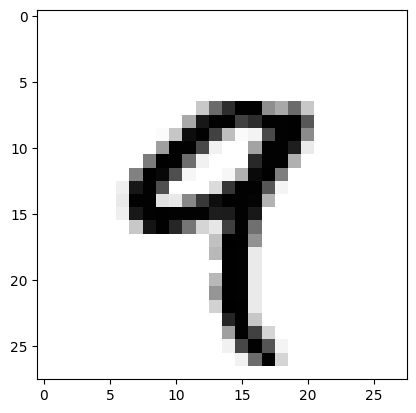

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

* 데이터셋에 있는 다섯 번째 데이터를 형상화 해보았음.

In [ ]:
train_labels[4]

9

* 레이블이 9임을 확인하였고, 위 예측이 올바르다 판단함.

**Q7. mnist 테스트 데이터셋에서 첫번째 숫자를 형상화해보기.**

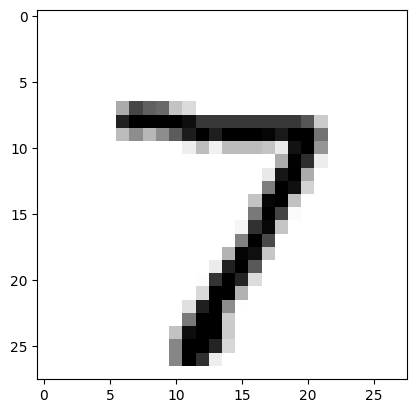

In [ ]:
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in NumPy

* 배열에 있는 특정 원소들을 선택하는 것을 슬라이싱(slicing)이라고함.

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

* 다음 예는 11번째에서 101번째까지(101번째는 포함하지 않고) 숫자를 선택하여 (90, 28, 28) 크기의 배열을 만듬.


In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

* 이것은 더 자세한 표기법으로 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정하는 것.
* 콜론(:)은 전체 인덱스를 선택하는 것.

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

* 14*14 픽셀을 선택하기.

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

* 정중앙에 위치한 14*14 픽셀 조각을 이미지에서 잘라내기.

### The notion of data batches

* 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축은 Sample axis라고 함.
* 딥러닝 모델은 한 번에 전체 데이터 세트를 처리하는 것이 아니라 데이터를 작은 배치(batch)로 나눔.

In [ ]:
batch = train_images[:128]
# mnist 숫자 데이터에서 크기가 128인 배치 하나.

In [ ]:
batch = train_images[128:256]
# 그 다음 같은 크기인 128로 나눈 배치.

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
# n번째 배치는 다음과 같이 나타냄.

* 배치데이터를 다룰 때 첫 번쨰 축을 배치 축(batch axis) 또는 배치 차원(batch dimension)이라고 부름.

3/13 Lecture is End!

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary